# Grid search - gini - entropy - 

## Comparison between grid search and successive halving
https://scikit-learn.org/stable/auto_examples/model_selection/plot_successive_halving_heatmap.html#sphx-glr-auto-examples-model-selection-plot-successive-halving-heatmap-py
La fonction [HalvingGridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html#sklearn.model_selection.HalvingGridSearchCV) est plus efficace 

In [23]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:

iris = load_iris()

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 



# Choix des hyperparamètres
criterion : Le meilleur score reste le même peu importe la valeur choisie pour criterion (gini ou entropy).


In [80]:
grid_parameters_gini = {'criterion' : ['gini'],'max_depth': [1,2,3,4,5], 'min_samples_split': [2,3,4,5], 'min_samples_leaf': [1,2,3,4,5],'random_state' : [42]}
grid_parameters_entropy = {'criterion' : ['entropy'],'max_depth': [1,2,3,4,5], 'min_samples_split': [2,3,4,5], 'min_samples_leaf': [1,2,3,4,5],'random_state' : [42]}

In [81]:


# Define the parameters and the scoring function
# scoring = {'f1_score': make_scorer(f1_score), 'accuracy_score': make_scorer(accuracy_score)}
scoring = make_scorer(accuracy_score)
# Perform the grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), grid_parameters_gini, scoring=scoring, cv=5, n_jobs=-1)
default = GridSearchCV(DecisionTreeClassifier(), grid_parameters_entropy, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
default.fit(X_train, y_train)



# Print the results
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

print('Best parameters:', default.best_params_)
print('Best score:', default.best_score_)


Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 42}
Best score: 0.9731225296442687
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 42}
Best score: 0.9731225296442687


In [38]:
type(dt)

sklearn.tree._classes.DecisionTreeClassifier

In [44]:
y_pred = gs_fit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


In [43]:
y_pred = grid_search_gini.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


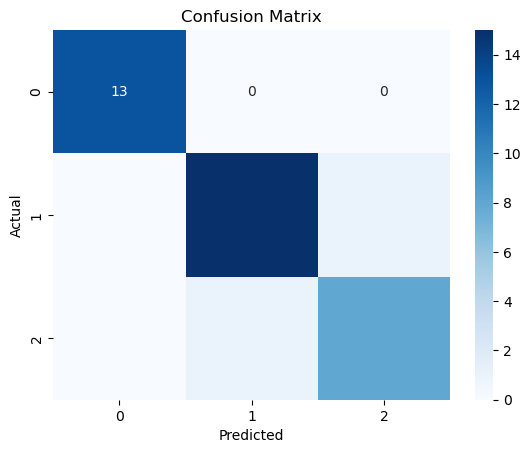

In [22]:
# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Display the plot
plt.show()

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

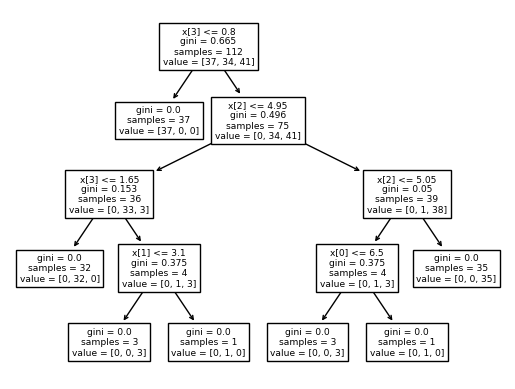

In [39]:
tree.plot_tree(dt)